In [1]:
from data_processing import *
brands_path = 'faq_chitchat_data/binary_data/brands.txt'
chitchat_test_path = 'faq_chitchat_data/binary_data/chitchat_test.txt' 
chitchat_train_path = 'faq_chitchat_data/binary_data/train_random_id.txt'
faq_train_path = 'faq_data/faq_total.yml'

In [2]:
"""
    Test the function of 'remo_emoji_symbol'
    Suppose the after-processing data would not have emojis,@ and #
    print the before/after data in the end
"""

pathfile = 'faq_chitchat_data/binary_data/chitchat_data.txt'

examples_list = []
with open(pathfile ,'r',encoding='utf-8') as file:
    filecontent = file.readlines()
    for line in filecontent:
        examples_list.append(line)

clean_data = remo_emoji_symbol(pathfile)

print(examples_list[0:5])
print('------------------after remove emoji and symbol-----------------------')
print(clean_data[0:5])

['- THE ENERGY HAS BEEN CONFIRMED  THE VIBE IS POSITIVE @ASOS #NATIONALOVIEDAY\n', '- why are you putting prices up to make discounts look better @asos #asosblackfriday - full price yesterday! discount today 🙄 #scam\n', '- Had a great time tonight @ASOS  thanks for having me ❤\n', '- So @jonathanjoly picked 5 outfits for me from @asos...we filmed the whole try-on haul &amp; our reactions which will be up tomorrow! 😍 But here’s a preview of what to expect  this was the “office look” 🙈😂 Underneath I am wearing a boob tube 🤣\n', '- Front cover of @asos 😎\n']
------------------after remove emoji and symbol-----------------------
['- THE ENERGY HAS BEEN CONFIRMED  THE VIBE IS POSITIVE ASOS NATIONALOVIEDAY\n', '- why are you putting prices up to make discounts look better asos asosblackfriday - full price yesterday! discount today  scam\n', '- Had a great time tonight ASOS  thanks for having me \n', '- So jonathanjoly picked 5 outfits for me from asos...we filmed the whole try-on haul &amp; 

In [26]:
"""
    Test the function of 'replace_brand'
    Suppose the brands name in the sentences such as asos, nike would be replaced by random ID
"""

with open(chitchat_test_path ,'r', encoding='utf-8') as file:
    test_list = []
    filecontent = file.readlines()
    for line in filecontent:
        text = line.replace('- ', '')
        text = text.replace('\n', '')
        test_list.append(text)
print('original sample: ')       
print(test_list[0:2])
print('sample replace brand: ')
test_random_id = replace_brand(brands_path,chitchat_test_path)
print(test_random_id[0:2])

original sample: 
['why are you putting prices up to make discounts look better asos asosblackfriday full price yesterday! discount today  scam', 'Had a great time tonight ASOS  thanks for having me']
sample replace brand: 
['why are you putting prices up to make discounts look better 7dg 7dgblackfriday full price yesterday! discount today  scam', 'Had a great time tonight yxn9  thanks for having me']


In [27]:
"""
    Test the function of 'calculate_chitchat_length' and 'calculate_faq_length'
    Calculate lenght distributon from txt file and yaml file, return dicts.
"""

chit_chat_length = calculate_chitchat_length(chitchat_train_path)
faq_length = calculate_faq_length(faq_train_path)
print(chit_chat_length)
print(faq_length)

{'0-9': 1803, '10-19': 1681, '20-29': 633, '30-39': 294, '40-49': 150, '50-59': 62, '60-69': 6}
{'0-9': 2349, '10-19': 1910, '20-29': 380, '30-39': 132, '40-49': 50, '50-59': 18, '60-69': 7}


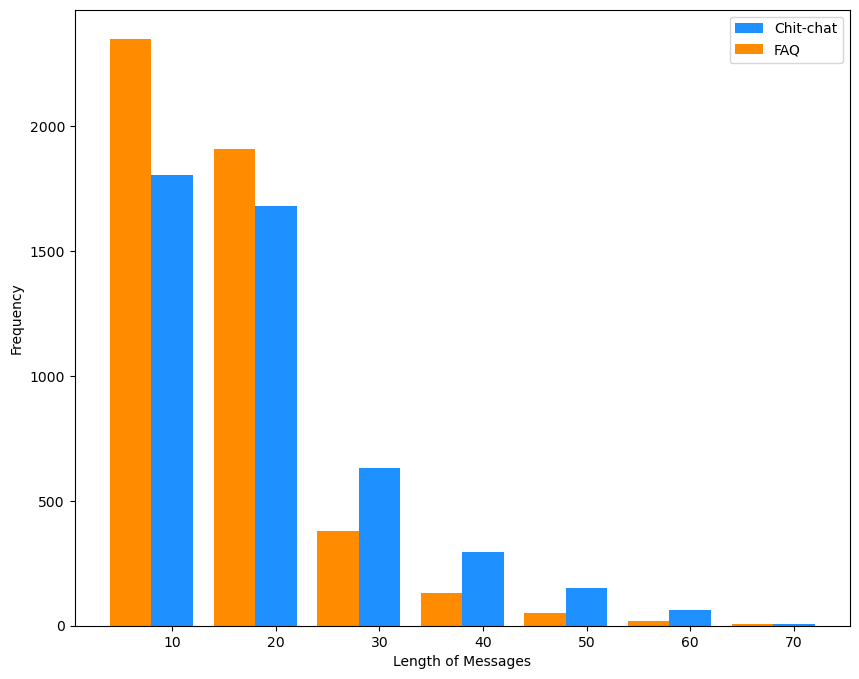

In [28]:
"""
    Test the function of 'plot_length_distribution' 
    Return a bar chart
"""

plot_length_distribution(faq_length,chit_chat_length)

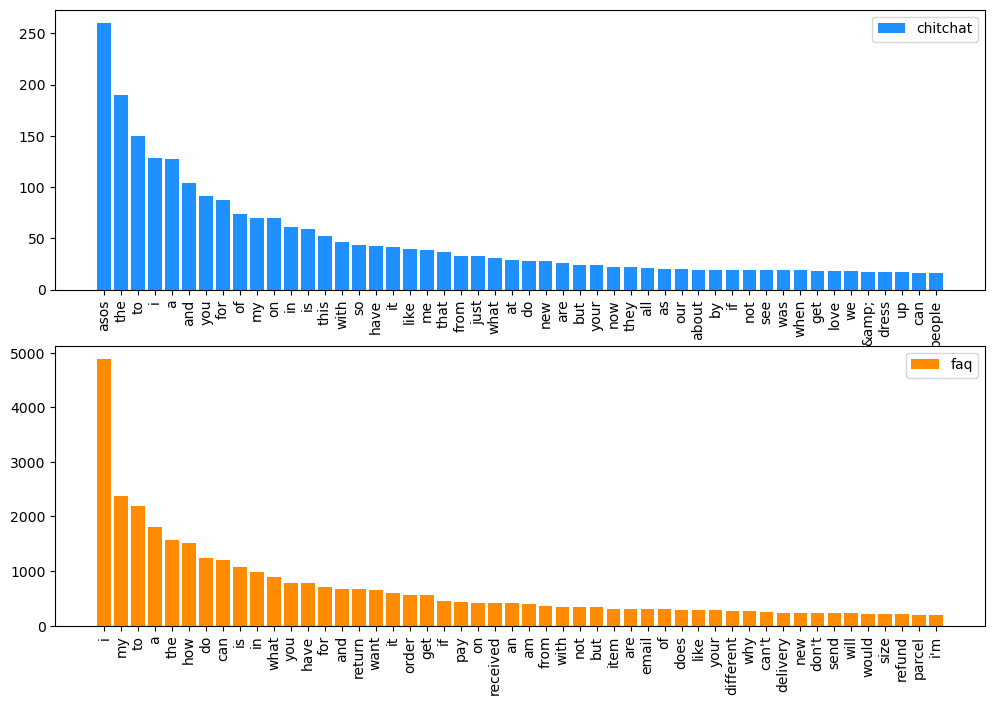

In [29]:
"""
    Test the functions 'plot_frequency', we give two dataset path and plot the top 50 frequency words' distribution
"""

plot_frequency(faq_train_path, chitchat_test_path, 50)

In [ ]:
# Test the faq classifier model and give the performance metrics (5 cross-validation)


!pip install transformers==2.8.0
!pip3 install "prompt_toolkit==2.0.1" -q
!pip3 install -U ipython -q
!pip3 install rasa[convert]

from model_testing import model_performance_one_step

from rasa.cli.utils import get_validated_path
from rasa.model import get_model, get_model_subdirectories
from rasa.nlu.model import Interpreter
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import rasa.shared.nlu.training_data.loading as nlu_loading
import pandas as pd

In [ ]:
DIET_original = ['FAQ/models_without_augment/cv1_DIET.tar.gz',
           'FAQ/models_without_augment/cv2_DIET.tar.gz',
           'FAQ/models_without_augment/cv3_DIET.tar.gz',
           'FAQ/models_without_augment/cv4_DIET.tar.gz',
           'FAQ/models_without_augment/cv5_DIET.tar.gz']

DIET_Pre_original = ['FAQ/models_without_augment/cv1_DIET_Pretrained.tar.gz',
           'FAQ/models_without_augment/cv2_DIET_Pretrained.tar.gz',
           'FAQ/models_without_augment/cv3_DIET_Pretrained.tar.gz',
           'FAQ/models_without_augment/cv4_DIET_Pretrained.tar.gz',
           'FAQ/models_without_augment/cv5_DIET_Pretrained.tar.gz']

BERT_original = ['FAQ/models_without_augment/cv1_BERT.tar.gz',
           'FAQ/models_without_augment/cv2_BERT.tar.gz',
           'FAQ/models_without_augment/cv3_BERT.tar.gz',
           'FAQ/models_without_augment/cv4_BERT.tar.gz',
           'FAQ/models_without_augment/cv5_BERT.tar.gz']


faq_test_path = ['FAQ/data/1cv_original_test.yml',
          'FAQ/data/2cv_original_test.yml',
          'FAQ/data/3cv_original_test.yml',
          'FAQ/data/4cv_original_test.yml',
          'FAQ/data/5cv_original_test.yml',]

metrics1_faq_aug = model_performance_one_step(DIET_original,faq_test_path)
metrics2_faq_aug = model_performance_one_step(DIET_Pre_original,faq_test_path)
metrics3_faq_aug = model_performance_one_step(BERT_original,faq_test_path)

faq_with_aug_performance = model_comparsion(metrics1_faq_aug,metrics2_faq_aug,metrics3_faq_aug)
print(faq_with_aug_performance)